<a href="https://colab.research.google.com/github/ththtec/Grupo7_ProjetoFinal/blob/main/An%C3%A1lis_do_Carnaval_BH_Python_%26_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚀 Análise do Carnavel de BH com SQL e Python

Este notebook realiza uma análise completa sobre uma base de dados de Carnavel 2023 de Belo Horizonte.

 Usaremos SQL para as consultas e Python (com as bibliotecas Sqlite3, Pandas, Numpy, Matplotlib.pyplot, Seaborn e Squarify) para a manipulação e visualização dos dados..

## Passo 1: Configuração do Ambiente

In [128]:
# Análise_Carnaval_Grupo3_7_PROJETOFINAL.ipynb
# Notebook de análise dos dados do Carnaval - Grupo 3_7


# Configuração inicial do ambiente
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
!pip install squarify

# Configurações de visualização
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

print("✅ Ambiente configurado!")

# Criando conexão com banco SQLite em memória
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

print(" Banco de dados SQLite criado em memória!")

✅ Ambiente configurado!
 Banco de dados SQLite criado em memória!


##Passo 2: Inserção dos Dados

Aqui usamos o arquivo tabelafianl.csv

In [129]:
from google.colab import files
uploaded = files.upload()

Saving tabelafinal.csv to tabelafinal (4).csv


In [130]:
import pandas as pd
from sqlalchemy import create_engine

# Leitura do CSV
df = pd.read_csv('tabelafinal.csv')

# Conexão com SQLite
engine = create_engine('sqlite:///tabelafinal.db')

# Envio para o banco
df.to_sql('tabelafinal', con=engine, if_exists='replace', index=False)

print("Dados carregados com sucesso!")


Dados carregados com sucesso!


##Passo 3: Visualizando o DF

In [131]:
display(pd.read_sql_query("SELECT * FROM tabelafinal LIMIT 5", engine))

,bloquinho,idade,faixaetaria,morador,ufpais,estado,pernoitar,quantaspernoites,meiodehospedagem,transporteparacidade,...,genero,escolaridade,estadocivil,renda,faixarenda,rendamedia,transporteblocos,apoioLGBTQIA,fazparteLGBTQIA,data
0,BAIANAS OZADAS,61,Idoso,Morador,Brasil,Minas Gerais,None,None,None,None,...,Feminino,Posgraduacao/ Mestrado/ Doutorado completo,Divorciado(a),Entre 3 SM e 5 SM (R$3.906 01 a R$6.51000),Entre 3 e 5 SM,5208.0,Carro de amigos ou Parentes,Sim,Nao,2023-02-20
1,HAVAYANAS USADAS,21,Jovem,Morador,Brasil,Minas Gerais,None,None,None,None,...,Feminino,Ensino Medio completo,Solteiro(a),NR_NS,None,NaN,Onibus coletivo,Sim,Nao,2023-02-20
2,BATUQUE COLETIVO,42,Meia-idade,Morador,Brasil,Minas Gerais,None,None,None,None,...,Feminino,Posgraduacao/ Mestrado/ Doutorado completo,Solteiro(a),Entre 3 SM e 5 SM (R$3.906 01 a R$6.51000),Entre 3 e 5 SM,5208.0,A pe,Sim,Nao,2023-02-19
3,BATUQUE COLETIVO,40,Meia-idade,Morador,Brasil,Minas Gerais,None,None,None,None,...,Feminino,Ensino Superior completo,Casado(a),Acima de 10 SM (R$ 13.02001),Acima de 10 SM,13020.0,A pe,Sim,Nao,2023-02-19
4,BAIANAS OZADAS,28,Jovem,Morador,Brasil,Minas Gerais,None,None,None,None,...,Masculino,Ensino Superior completo,Solteiro(a),Acima de 10 SM (R$ 13.02001),Acima de 10 SM,13020.0,Veiculo Proprio,Sim,Nao,2023-02-20


In [132]:
# Função auxiliar para executar queries e retornar DataFrames
def executar_query(query, engine):
    """Executa uma query SQL e retorna o resultado como um DataFrame do Pandas."""
    return pd.read_sql_query(query, engine)
print("Função 'executar_query' criada.")

Função 'executar_query' criada.


## 1. Analisando o Perfil dos Participantes

In [111]:
# Query para analisar o perfil dos participantes
query_perfil = """
SELECT
  genero,
  escolaridade,
  estadocivil,
  renda,
  COUNT(*) AS total_pessoas
FROM tabelafinal
GROUP BY genero, escolaridade, estadocivil, renda
ORDER BY total_pessoas DESC;
"""

def executar_query(query, engine):
    return pd.read_sql_query(query, engine)
display(executar_query(query_perfil, engine))

,genero,escolaridade,estadocivil,renda,total_pessoas
0,Feminino,Pós-graduação,Solteiro(a),De 5 a 10 salários mínimos,31
1,Feminino,Pós-graduação,Solteiro(a),Mais de 10 salários mínimos,17
2,Masculino,Pós-graduação,Solteiro(a),Mais de 10 salários mínimos,17
3,Feminino,Pós-graduação,Solteiro(a),De 3 a 5 salários mínimos,14
4,Masculino,Pós-graduação,Solteiro(a),De 5 a 10 salários mínimos,12
5,Masculino,Superior completo,Solteiro(a),De 3 a 5 salários mínimos,10
6,Feminino,Pós-graduação,Casado(a),De 5 a 10 salários mínimos,9
7,Feminino,Superior completo,Solteiro(a),De 3 a 5 salários mínimos,8
8,Feminino,Superior completo,Solteiro(a),De 5 a 10 salários mínimos,8
9,Masculino,Pós-graduação,Solteiro(a),De 3 a 5 salários mínimos,5


## Analises

### 1. Visualizando a Distribuição de Renda

In [133]:
# Agrupar por faixa de renda e contar número de pessoas
df_renda = (
    df.groupby("renda")
    .size()
    .reset_index(name="total")
)

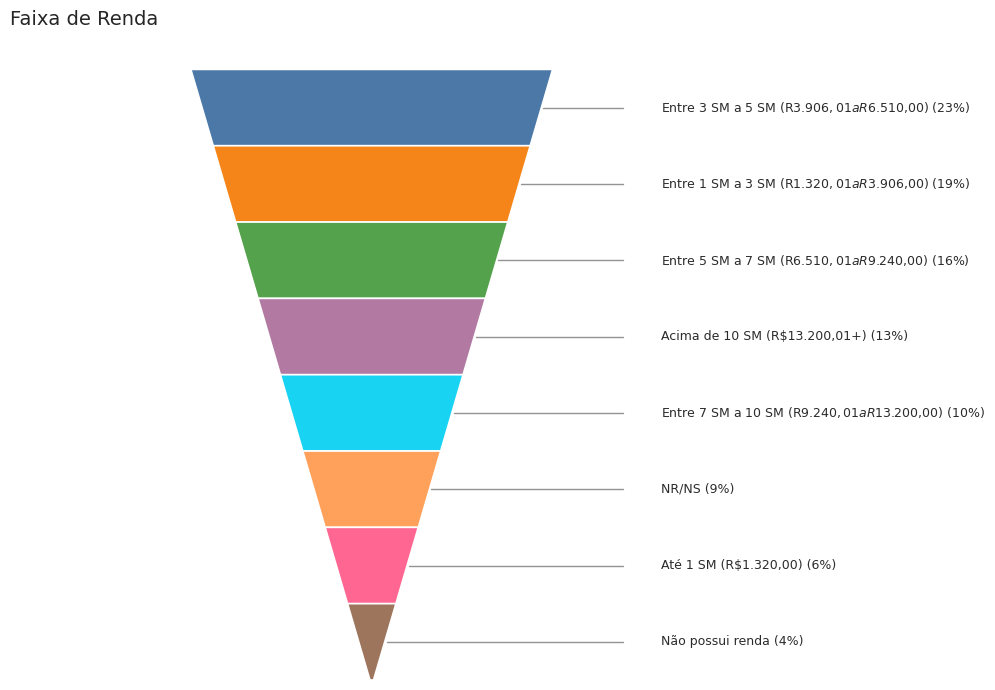

In [113]:
# ------------------ DADOS ------------------
df_renda = pd.DataFrame({
    "Faixa de Renda": [
        "Entre 3 SM a 5 SM (R$3.906,01 a R$6.510,00)",
        "Entre 1 SM a 3 SM (R$1.320,01 a R$3.906,00)",
        "Entre 5 SM a 7 SM (R$6.510,01 a R$9.240,00)",
        "Acima de 10 SM (R$13.200,01+)",
        "Entre 7 SM a 10 SM (R$9.240,01 a R$13.200,00)",
        "NR/NS",
        "Até 1 SM (R$1.320,00)",
        "Não possui renda"
    ],
    "Total Pessoas": [120, 100, 85, 70, 55, 45, 30, 20]
})

# Ordena do maior para o menor (topo -> base)
df_plot = df_renda.sort_values("Total Pessoas", ascending=False).reset_index(drop=True)
tot = df_plot["Total Pessoas"].sum()
df_plot["pct"] = df_plot["Total Pessoas"] / tot

# ------------------ PARÂMETROS VISUAIS ------------------
n = len(df_plot)
H = 1.0
h = H / n
W_top = 4.0            # AQUI deixamos a pirâmide mais larga
tip_ratio = 0.01
W_bottom = W_top * tip_ratio

colors = [
    "#4C78A8", "#F58518", "#54A24B", "#B279A2",
    "#19D3F3", "#FFA15A", "#FF6692", "#9D755D"
][:n]

def width_at_y(y):
    return W_top + (W_bottom - W_top) * y

fig, ax = plt.subplots(figsize=(10, 7))
ax.set_facecolor("#ECF2FA")

y_edges = np.linspace(0, H, n + 1)


# Pirâmide centralizada
for i, (label, val, pct, col) in enumerate(zip(df_plot["Faixa de Renda"], df_plot["Total Pessoas"], df_plot["pct"], colors)):
    y_top = y_edges[i]
    y_bot = y_edges[i + 1]
    W_t = width_at_y(y_top)
    W_b = width_at_y(y_bot)

    x_left_top  = -W_t / 2
    x_right_top =  W_t / 2
    x_left_bot  = -W_b / 2
    x_right_bot =  W_b / 2

    poly_x = [x_left_top, x_right_top, x_right_bot, x_left_bot]
    poly_y = [1 - y_top,  1 - y_top,  1 - y_bot,  1 - y_bot]
    ax.fill(poly_x, poly_y, color=col, edgecolor="white", linewidth=1.2)


# ------------------ RÓTULOS FORA + LINHAS ------------------
label_gap = 0.02
x_right_edge_for_text = 0.8 * W_top
x_line_end            = 0.7 * W_top

for i, (label, pct) in enumerate(zip(df_plot["Faixa de Renda"], df_plot["pct"])):
    y_top = y_edges[i]
    y_bot = y_edges[i + 1]
    y_mid = 1 - (y_top + y_bot) / 2
    W_mid = width_at_y((y_top + y_bot) / 2)
    x_edge = W_mid / 2

    ax.plot([x_edge + label_gap, x_line_end - label_gap], [y_mid, y_mid],
            color="gray", linewidth=1, alpha=0.85)

    ax.text(x_right_edge_for_text, y_mid, f"{label} ({pct:.0%})",
            va="center", ha="left", fontsize=9, color="#2b2b2b")


# ------------------ ACABAMENTO ------------------
pad = 0.2 * W_top
ax.set_xlim(-0.8 * W_top - pad, 0.8 * W_top + pad)  # limites
ax.set_ylim(0, 1.05)
ax.set_aspect('auto')
ax.axis("off")
ax.set_title("Faixa de Renda", loc="left", fontsize=14, pad=10)

plt.tight_layout()
plt.show()

###2. Distribuição de Moradores vs. Visitantes

In [115]:
# Distribuição de moradores
query_moradores = """
SELECT
  morador,
  COUNT(*) AS quantidade,
  ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER (), 2) AS porcentagem
FROM tabelafinal
GROUP BY morador;
"""

df_moradores = executar_query(query_moradores, )
print("\n📍 Distribuição: Moradores vs. Visitantes")
display(df_moradores)


📍 Distribuição: Moradores vs. Visitantes


,morador,quantidade,porcentagem
0,Não,61,40.13
1,Sim,91,59.87


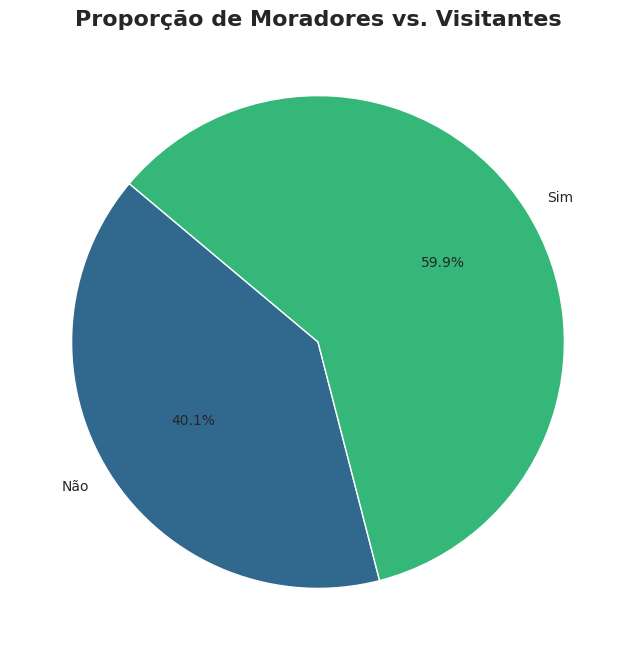

In [117]:
#Visualização da proporção entre moradores e visitantes no Carnaval BH 2023.

plt.figure(figsize=(8, 8))
plt.pie(
    df_moradores['quantidade'],
    labels=df_moradores['morador'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('viridis', len(df_moradores))
)
plt.title('Proporção de Moradores vs. Visitantes', fontsize=16, weight='bold')
plt.ylabel('')
plt.show()

### 3. De Onde Vêm os Visitantes?


####🌎 Distribuição de Visitantes por País

In [134]:
# Agrupa os dados por país (`ufpais`)
# Conta quantos visitantes vieram de cada país
# Ordena do país com mais visitantes para o que teve menos
query_paises = """
SELECT
  ufpais AS pais,
  COUNT(*) AS total_visitantes
FROM tabelafinal
GROUP BY ufpais
ORDER BY total_visitantes DESC;
"""

df_paises = executar_query(query_paises, engine)
print(" Distribuição por Países:")
display(df_paises)

 Distribuição por Países:


,pais,total_visitantes
0,Brasil,1116
1,Irlanda,1
2,Franca,1
3,Canada,1


In [136]:
# Dados consolidados
tabela_paises = pd.DataFrame({
    "Pais": ["Brazil", "Canada", "Franca", "Irlanda"],
    "Qtd_Visitantes": [997, 1, 1, 1]
})

# Corrigir nomes para os reconhecidos pelo Plotly
corrigir_nomes = {
    "Franca": "France",
    "Irlanda": "Ireland",
    "Brazil": "Brazil",
    "Canada": "Canada"
}
tabela_paises["Pais"] = tabela_paises["Pais"].map(corrigir_nomes)

# Criar mapa com cor fixa para todos os países que tiveram visitantes
import plotly.express as px
fig = px.choropleth(
    tabela_paises,
    locations="Pais",
    locationmode="country names",
    color_discrete_sequence=["#1f77b4"],  # Azul fixo
    title="🌍 Países com Visitantes Destacados"
)

# Forçar todos os selecionados a ficarem com a mesma cor
fig.update_traces(marker_line_color="black", marker_line_width=0.5)

# Cinza para países sem visitantes
fig.update_geos(
    showframe=False,
    showcoastlines=True,
    projection_type="natural earth",
    bgcolor="white",
    landcolor="lightgray"
)

fig.show()

####Visitantes Brasileiros por Estado

In [86]:
# Mapa do Brasil para visitantes BRASILEIROS por ESTADO
query_estados_brasil = """
SELECT
  `estado ` AS estado_brasileiro,
  COUNT(*) AS total_visitantes
FROM tabelafinal
WHERE morador = 'Visitante' AND (`ufpais` = 'BR' OR LOWER(`ufpais`) = 'brasil')  -- Filtra apenas brasileiros
GROUP BY `estado `
ORDER BY total_visitantes DESC;
"""

df_estados_br = executar_query(query_estados_brasil, engine)
print("\n🇧🇷 Distribuição de Visitantes Brasileiros por Estado:")
display(df_estados_br)


🇧🇷 Distribuição de Visitantes Brasileiros por Estado:


,estado_brasileiro,total_visitantes
0,Minas Gerais,111
1,Sao Paulo,20
2,Espirito Santo,7
3,Rio de Janeiro,5
4,Mato Grosso,3
5,Distrito Federal,3
6,Bahia,3
7,Rio Grande do Sul,2
8,Rio Grande do Norte,2
9,Parana,2


In [95]:
import pandas as pd
import plotly.express as px

# Lista oficial de estados brasileiros
estados_brasil = [
    "Acre", "Alagoas", "Amapá", "Amazonas", "Bahia", "Ceará", "Distrito Federal",
    "Espírito Santo", "Goiás", "Maranhão", "Mato Grosso", "Mato Grosso do Sul",
    "Minas Gerais", "Pará", "Paraíba", "Paraná", "Pernambuco", "Piauí",
    "Rio de Janeiro", "Rio Grande do Norte", "Rio Grande do Sul", "Rondônia",
    "Roraima", "Santa Catarina", "São Paulo", "Sergipe", "Tocantins"
]

# Correção de nomes para compatibilidade com GeoJSON
correcao_nomes = {
    "Sao Paulo": "São Paulo",
    "Espirito Santo": "Espírito Santo",
    "Parana": "Paraná",
    "Piaui": "Piauí",
    "Goias": "Goiás",
    "Ceara": "Ceará",
    "Para": "Pará",
    "Rondonia": "Rondônia",
    "Roraima": "Roraima",
    "Santa Catarina": "Santa Catarina",
    "Sergipe": "Sergipe",
    "Tocantins": "Tocantins"
}

# Query SQL para visitantes brasileiros por estado
query_estados_brasil = """
SELECT
  TRIM(`estado `) AS estado_brasileiro,
  COUNT(*) AS total_visitantes
FROM tabelafinal
WHERE morador = 'Visitante' AND (`ufpais` = 'BR' OR LOWER(`ufpais`) = 'brasil')
GROUP BY `estado `
ORDER BY total_visitantes DESC;
"""

# Executar a query
df_estados_br = executar_query(query_estados_brasil, engine)

# Padronizar nomes
df_estados_br["estado_brasileiro"] = df_estados_br["estado_brasileiro"].str.title().str.strip()
df_estados_br["estado_brasileiro"] = df_estados_br["estado_brasileiro"].replace(correcao_nomes)

# Garantir que todos os estados apareçam
df_mapa = pd.DataFrame({"estado": estados_brasil})
df_mapa = df_mapa.merge(df_estados_br, how="left", left_on="estado", right_on="estado_brasileiro")
df_mapa["total_visitantes"] = df_mapa["total_visitantes"].fillna(0).astype(int)

# Classificar faixas de visitantes
def classificar_faixa(valor):
    if valor == 0:
        return "Sem visitantes"
    elif valor <= 5:
        return "1 a 5"
    elif valor <= 20:
        return "6 a 20"
    else:
        return "21+"

df_mapa["faixa_visitantes"] = df_mapa["total_visitantes"].apply(classificar_faixa)

# Cores personalizadas para cada faixa
cores_personalizadas = {
    "Sem visitantes": "#d3d3d3",  # Cinza claro
    "1 a 5": "#a6cee3",           # Azul claro
    "6 a 20": "#1f78b4",          # Azul médio
    "21+": "#08306b"              # Azul escuro
}

# Criar mapa coroplético
fig = px.choropleth(
    df_mapa,
    geojson="https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson",
    locations="estado",
    featureidkey="properties.name",
    color="faixa_visitantes",
    color_discrete_map=cores_personalizadas,
    title="🗺️ Visitantes Brasileiros por Estado - Carnaval BH (Faixas)"
)

# Ajustes visuais
fig.update_geos(fitbounds="locations", visible=False)
fig.update_traces(marker_line_color="black", marker_line_width=0.5)

fig.show()


###Popularidade dos Bloccos

Quais foram os blocos mais frequentados segundo os entrevistados?

In [ ]:
query_blocos = """
SELECT
  bloquinho,
  COUNT(*) AS total_pessoas
FROM `tabelafinal`
GROUP BY bloquinho
ORDER BY total_pessoas DESC;
"""
df_blocos = executar_query(query_blocos)
print("\n🎶 Popularidade dos Blocos (Top 15)")
display(df_blocos.head(15))


🎶 Popularidade dos Blocos (Top 15)


,bloquinho,total_pessoas
0,QUANDO COME SE LAMBUZA,92
1,FUNK YOU,92
2,ENTAO BRILHA!,92
3,BLOCO DA CALIXTO,92
4,BAIANAS OZADAS,91
5,BLOCO ANGOLA JANGA,79
6,HAVAYANAS USADAS,64
7,BATUQUE COLETIVO,63
8,BEICO DO WANDO,62
9,BAIANEIROS,60


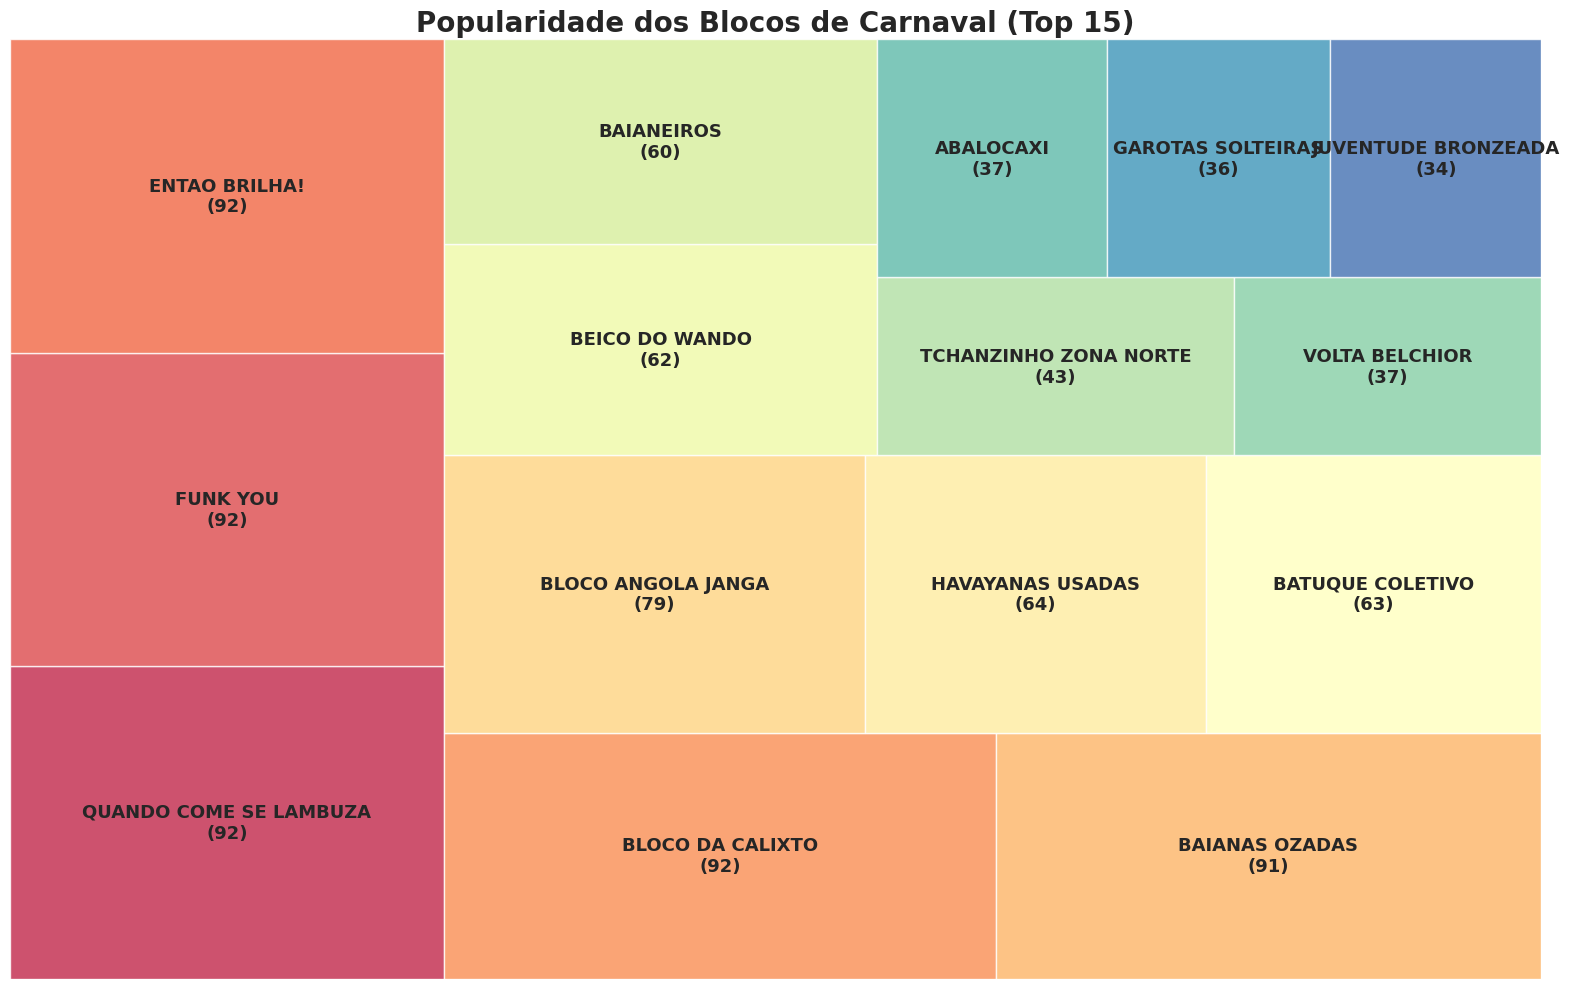

In [ ]:
# Dados
import squarify as sq

# Select the top 15 rows from df_blocos and assign them to a new variable
top_15_blocos = df_blocos.head(15)

sizes = top_15_blocos['total_pessoas']
labels = [f"{nome}\n({contagem})" for nome, contagem in zip(top_15_blocos['bloquinho'], top_15_blocos['total_pessoas'])]

# Cores vibrantes
colors = sns.color_palette('Spectral', len(sizes))

# Treemap estilizado
plt.figure(figsize=(16, 10))
sq.plot(
    sizes=sizes,
    label=labels,
    color=colors,
    alpha=0.8,
    text_kwargs={'fontsize': 13, 'weight': 'bold'},

)
# Título e layout
plt.title('Popularidade dos Blocos de Carnaval (Top 15)', fontsize=20, weight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

## Análise : Como as Pessoas se Informam sobre o Carnaval?

Quais são as principais fontes de informação que os foliões utilizam para saber sobre a programação do carnaval?

In [ ]:
# Query para fontes de informação
query_info = """
SELECT
  fonteinfocarnaval,
  COUNT(*) AS qtd_respostas
FROM `tabelafinal`
WHERE fonteinfocarnaval IS NOT NULL
GROUP BY fonteinfocarnaval
ORDER BY qtd_respostas DESC;
"""
df_info = executar_query(query_info)
print("\n📰 Principais Fontes de Informação sobre o Carnaval")
display(df_info)



📰 Principais Fontes de Informação sobre o Carnaval


,fonteinfocarnaval,qtd_respostas
0,Amigos/Parentes,82
1,Midias sociais,34
2,Internet,29
3,Ja conhece,10
4,Sites de noticias,6
5,NR_NS,3
6,Ja morou em Belo Horizonte,3
7,Pessoas fantasiadas,1
8,Folhetos,1


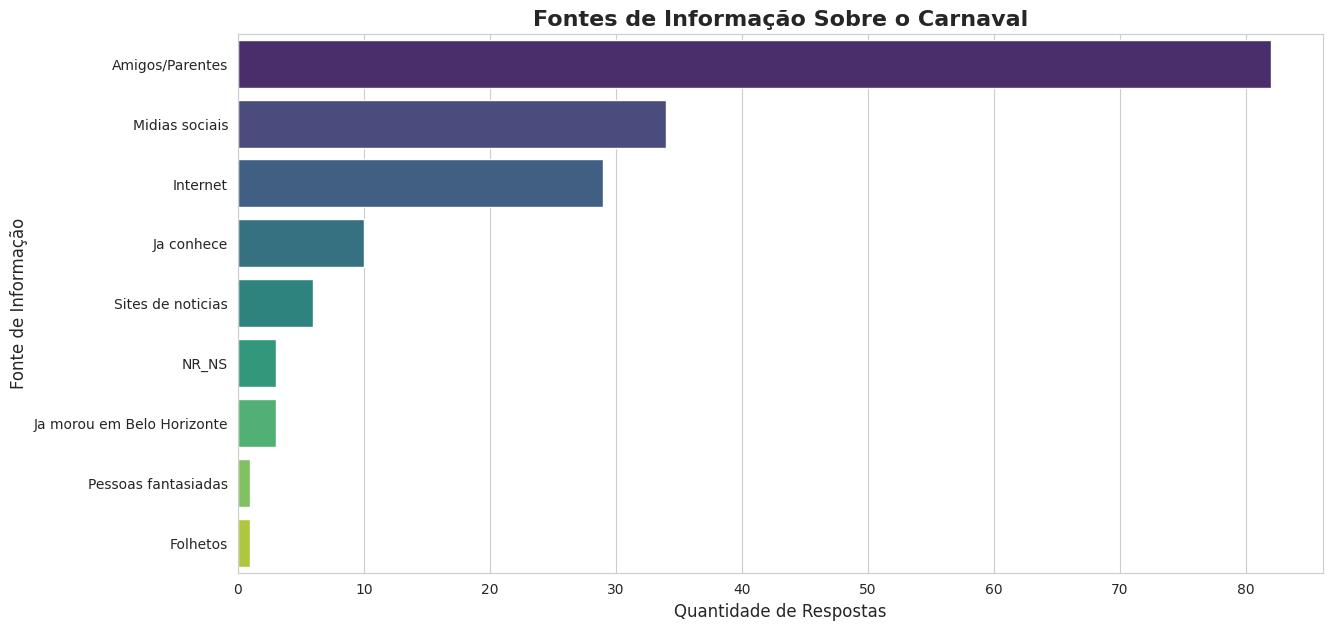

In [ ]:
# --- Visualização ---
plt.figure(figsize=(14, 7))
sns.barplot(
    data=df_info,
    x='qtd_respostas',
    y='fonteinfocarnaval',
    hue='fonteinfocarnaval',  # atribui o y ao hue
    palette='viridis',
    dodge=False,              # evita separação das barras
    legend=False              # remove legenda duplicada
)
plt.title('Fontes de Informação Sobre o Carnaval', fontsize=16, weight='bold')
plt.xlabel('Quantidade de Respostas', fontsize=12)
plt.ylabel('Fonte de Informação', fontsize=12)
plt.show()


##Análise : Avaliação Geral e por Categoria

Qual é a média das avaliações para os quesitos: Geral, Banheiros, Segurança e Preços? A escala vai de 1 a 10.

In [ ]:
# Query para médias das avaliações
query_medias = """
SELECT
  ROUND(AVG(NULLIF(avaliacaogeral, 999999)), 2) AS media_avaliacaogeral,
  ROUND(AVG(NULLIF(banheiros, 999999)), 2)       AS media_banheiros,
  ROUND(AVG(NULLIF(seguranca, 999999)), 2)       AS media_seguranca,
  ROUND(AVG(NULLIF(precos, 999999)), 2)          AS media_precos
FROM `tabelafinal`;
"""
df_medias = executar_query(query_medias)
print("\n📊 Média das Avaliações (de 1 a 10)")
display(df_medias)



📊 Média das Avaliações (de 1 a 10)


,media_avaliacaogeral,media_banheiros,media_seguranca,media_precos
0,8.67,6.25,7.31,6.11


/tmp/ipython-input-2797341762.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




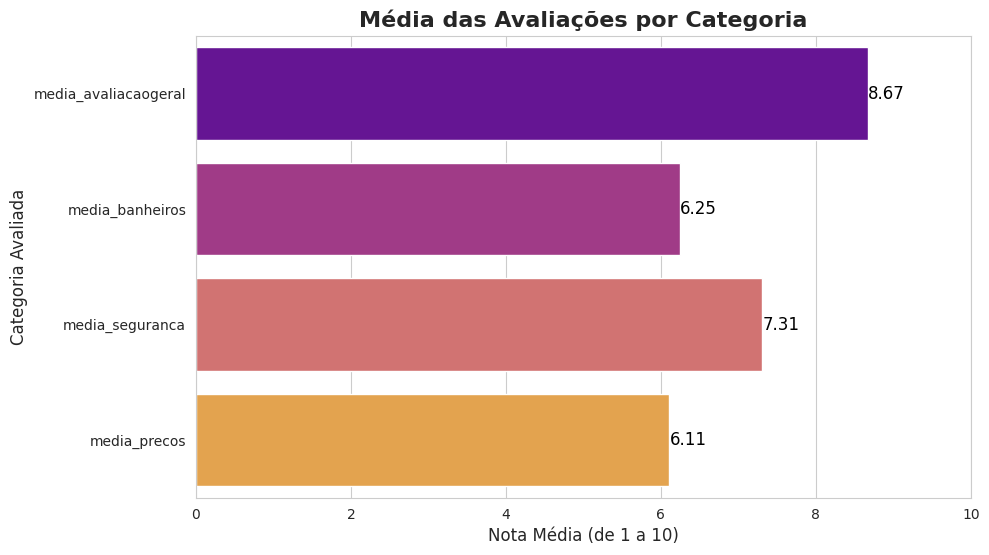

In [ ]:
# --- Visualização ---
# Reformatando o dataframe para visualização
df_medias_melted = df_medias.melt(var_name='Categoria', value_name='Média')

plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=df_medias_melted,
    x='Média',
    y='Categoria',
    palette='plasma'
)
# Adicionando os valores nas barras
for index, value in enumerate(df_medias_melted['Média']):
    plt.text(value, index, f'{value:.2f}', color='black', ha="left", va='center', size=12)

plt.title('Média das Avaliações por Categoria', fontsize=16, weight='bold')
plt.xlabel('Nota Média (de 1 a 10)', fontsize=12)
plt.ylabel('Categoria Avaliada', fontsize=12)
plt.xlim(0, 10) # Define o limite do eixo x para a escala de 1 a 10
plt.show()

##Análise : Inclusão e Apoio à Comunidade LGBTQIA+

Vamos analisar as respostas sobre fazer parte e apoiar a comunidade LGBTQIA+.

In [ ]:
# Query para inclusão LGBTQIA+
query_lgbtqia = """
SELECT
  apoioLGBTQIA,
  fazparteLGBTQIA,
  COUNT(*) AS total
FROM `tabelafinal`
GROUP BY apoioLGBTQIA, fazparteLGBTQIA
ORDER BY total DESC;
"""
df_lgbtqia = executar_query(query_lgbtqia)
print("\n Apoio e Inclusão da Comunidade LGBTQIA+")
display(df_lgbtqia)



 Apoio e Inclusão da Comunidade LGBTQIA+


,apoioLGBTQIA,fazparteLGBTQIA,total
0,Sim,Nao,722
1,Sim,Sim,356
2,NS/NR,Nao,22
3,Nao,Nao,18
4,Sim,NS/NR,1


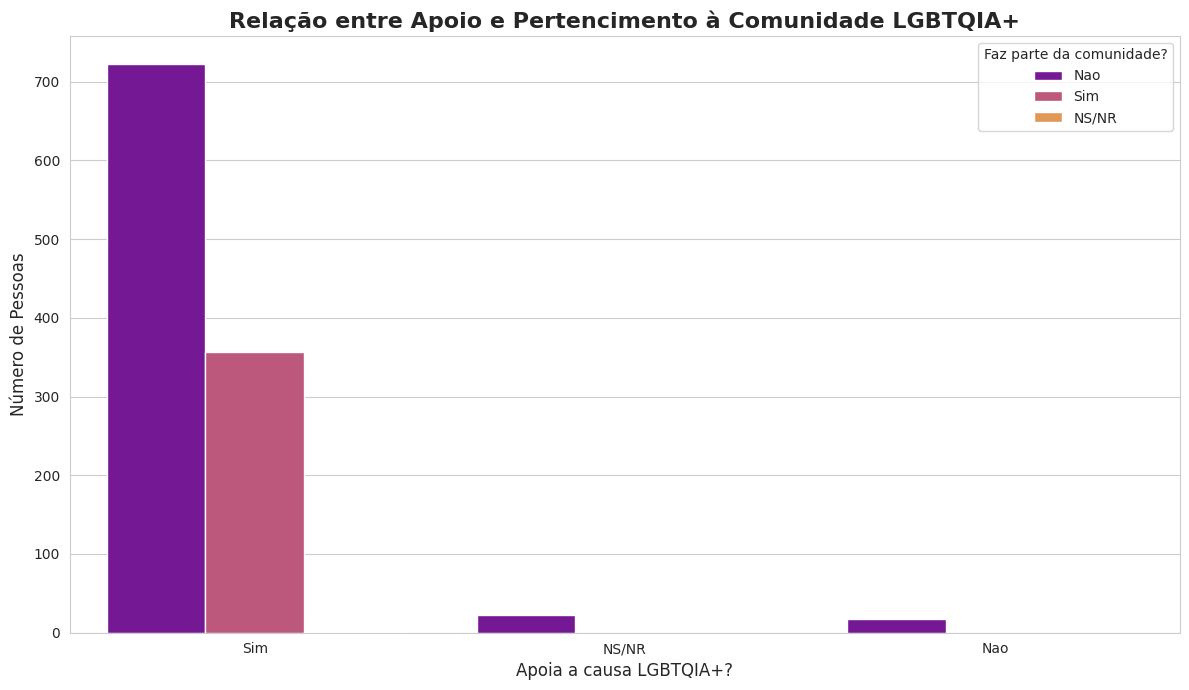

In [ ]:
# --- Visualização ---
plt.figure(figsize=(12, 7))

# Gráfico de barras agrupadas para comparar as categorias
sns.barplot(
    data=df_lgbtqia,
    x='apoioLGBTQIA',
    y='total',
    hue='fazparteLGBTQIA',
    palette='plasma'
)

plt.title('Relação entre Apoio e Pertencimento à Comunidade LGBTQIA+', fontsize=16, weight='bold')
plt.xlabel('Apoia a causa LGBTQIA+?', fontsize=12)
plt.ylabel('Número de Pessoas', fontsize=12)
plt.legend(title='Faz parte da comunidade?')
plt.xticks(rotation=0) # Garante que os rótulos do eixo x fiquem na horizontal
plt.tight_layout()
plt.show()

## Análise : Média de Gastos por Categoria (Geral)

Esta análise calcula o valor médio gasto em diferentes categorias por todos os participantes (moradores e visitantes).

In [ ]:
# Query para média de gastos gerais
query_gastos_geral = """
SELECT
  ROUND(AVG(NULLIF(gastohospedagem, 999999)), 2) AS hospedagem,
  ROUND(AVG(NULLIF(gastoatrativos, 999999)), 2) AS atrativos,
  ROUND(AVG(NULLIF(gastoalimentacao, 999999)), 2) AS alimentacao,
  ROUND(AVG(NULLIF(gastotransporte, 999999)), 2) AS transporte,
  ROUND(AVG(NULLIF(gastofatansias, 999999)), 2) AS fantasias,
  ROUND(AVG(NULLIF(gastocompras, 999999)), 2) AS compras,
  ROUND(AVG(NULLIF(gastoingressos, 999999)), 2) AS ingressos,
  ROUND(AVG(NULLIF(gastooutros, 999999)), 2) AS outros
FROM tabelafinal;
"""
df_gastos_geral = executar_query(query_gastos_geral)
print("\n-- Média de Gastos por Categoria (Geral) --")
display(df_gastos_geral)


-- Média de Gastos por Categoria (Geral) --


,hospedagem,atrativos,alimentacao,transporte,fantasias,compras,ingressos,outros
0,5.867290e+13,432.95,314.06,101.2,56.25,1.007376e+14,5.177137e+13,2.145054e+13


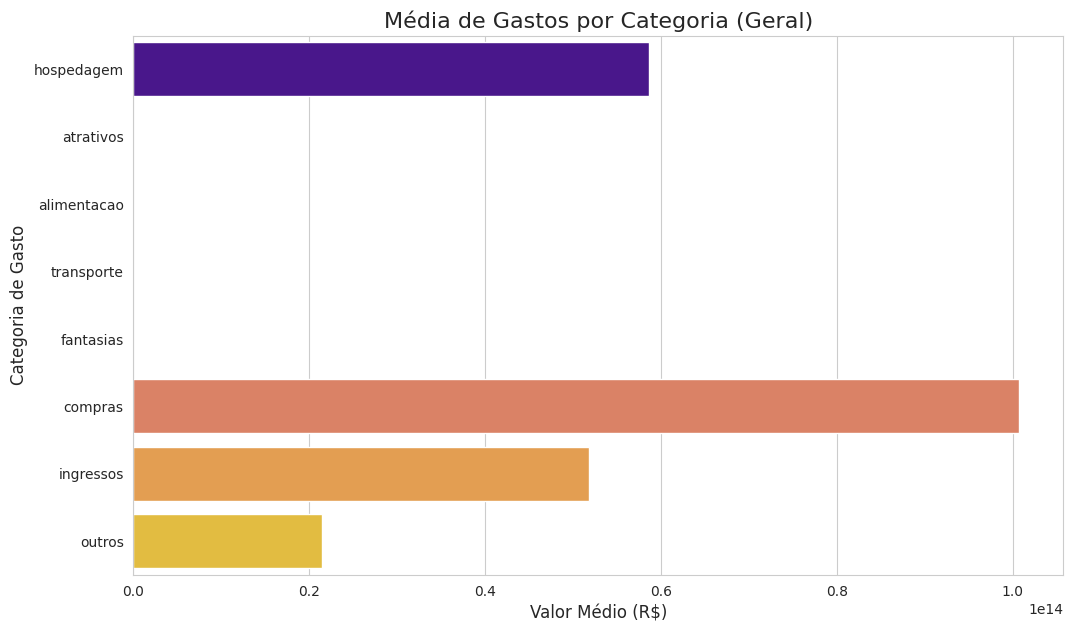

In [ ]:
# --- Visualização ---
# Reformatando o dataframe (de wide para long) para a visualização
df_gastos_geral_melted = df_gastos_geral.melt(var_name='Categoria de Gasto', value_name='Valor Médio (R$)')

plt.figure(figsize=(12, 7))
sns.barplot(
    data=df_gastos_geral_melted,
    x='Valor Médio (R$)',
    y='Categoria de Gasto',
    palette='plasma'
)
plt.title('Média de Gastos por Categoria (Geral)', fontsize=16)
plt.xlabel('Valor Médio (R$)', fontsize=12)
plt.ylabel('Categoria de Gasto', fontsize=12)
plt.show()

##Análise : Média de Gastos por Categoria (Apenas Visitantes)

In [ ]:
# Query para média gerais
query_gastos_geral = """
SELECT
  COALESCE(ROUND(AVG(NULLIF(gastohospedagem, 999999)), 2), 0) AS hospedagem,
  COALESCE(ROUND(AVG(NULLIF(gastoatrativos, 999999)), 2), 0) AS atrativos,
  COALESCE(ROUND(AVG(NULLIF(gastoalimentacao, 999999)), 2), 0) AS alimentacao,
  COALESCE(ROUND(AVG(NULLIF(gastotransporte, 999999)), 2), 0) AS transporte,
  COALESCE(ROUND(AVG(NULLIF(gastofatansias, 999999)), 2), 0) AS fantasias,
  COALESCE(ROUND(AVG(NULLIF(gastocompras, 999999)), 2), 0) AS compras,
  COALESCE(ROUND(AVG(NULLIF(gastoingressos, 999999)), 2), 0) AS ingressos,
  COALESCE(ROUND(AVG(NULLIF(gastooutros, 999999)), 2), 0) AS outros
FROM tabelafinal;
"""
df_gastos_geral = executar_query(query_gastos_geral)
print("\n-- Média de Gastos por Categoria (Geral) --")
display(df_gastos_geral)


-- Média de Gastos por Categoria (Geral) --


,hospedagem,atrativos,alimentacao,transporte,fantasias,compras,ingressos,outros
0,5.867290e+13,432.95,314.06,101.2,56.25,1.007376e+14,5.177137e+13,2.145054e+13


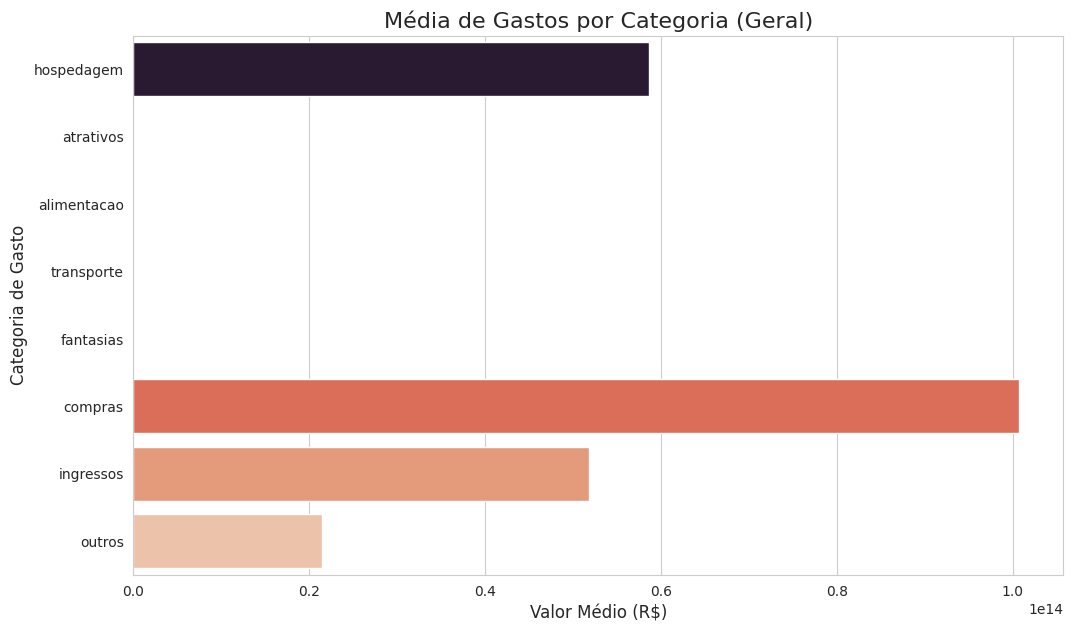

In [ ]:
# --- Visualização ---
df_gastos_geral_melted = df_gastos_geral.melt(var_name='Categoria de Gasto', value_name='Valor Médio (R$)')
plt.figure(figsize=(12, 7))
sns.barplot(
    data=df_gastos_geral_melted,
    x='Valor Médio (R$)',
    y='Categoria de Gasto',
    palette='rocket'
)
plt.title('Média de Gastos por Categoria (Geral)', fontsize=16)
plt.xlabel('Valor Médio (R$)', fontsize=12)
plt.ylabel('Categoria de Gasto', fontsize=12)
plt.show()


Gasto médio Visitantes

In [ ]:
query_gastos_visitantes = """
SELECT
    COALESCE(ROUND(AVG(NULLIF(gastoalimentacao, 999999)), 2), 0) AS media_alimentacao,
    COALESCE(ROUND(AVG(NULLIF(gastotransporte, 999999)), 2), 0) AS media_transporte,
    COALESCE(ROUND(AVG(NULLIF(gastofatansias, 999999)), 2), 0) AS media_fantasias,
    COALESCE(ROUND(AVG(NULLIF(gastocompras, 999999)), 2), 0) AS media_compras,
    COALESCE(ROUND(AVG(NULLIF(gastoingressos, 999999)), 2), 0) AS media_ingressos,
    COALESCE(ROUND(AVG(NULLIF(gastooutros, 999999)), 2), 0) AS media_outros,
    COALESCE(ROUND(AVG(NULLIF(gastototal, 999999)), 2), 0) AS media_total,
    COALESCE(ROUND(AVG(NULLIF(gastomediodiario, 999999)), 2), 0) AS media_diario
FROM tabelafinal
WHERE morador = 'Visitante';
"""
df_gastos_visitantes= executar_query(query_gastos_visitantes)
print("\n-- Média de Gastos por Categoria (Visitantes, Nova Versão com Filtro 'Visitante') --")
display(df_gastos_visitantes)



-- Média de Gastos por Categoria (Visitantes, Nova Versão com Filtro 'Visitante') --


,media_alimentacao,media_transporte,media_fantasias,media_compras,media_ingressos,media_outros,media_total,media_diario
0,527.38,163.46,75.79,2.491450e+14,1.069574e+14,3.028499e+13,3.262904e+14,7.687118e+13


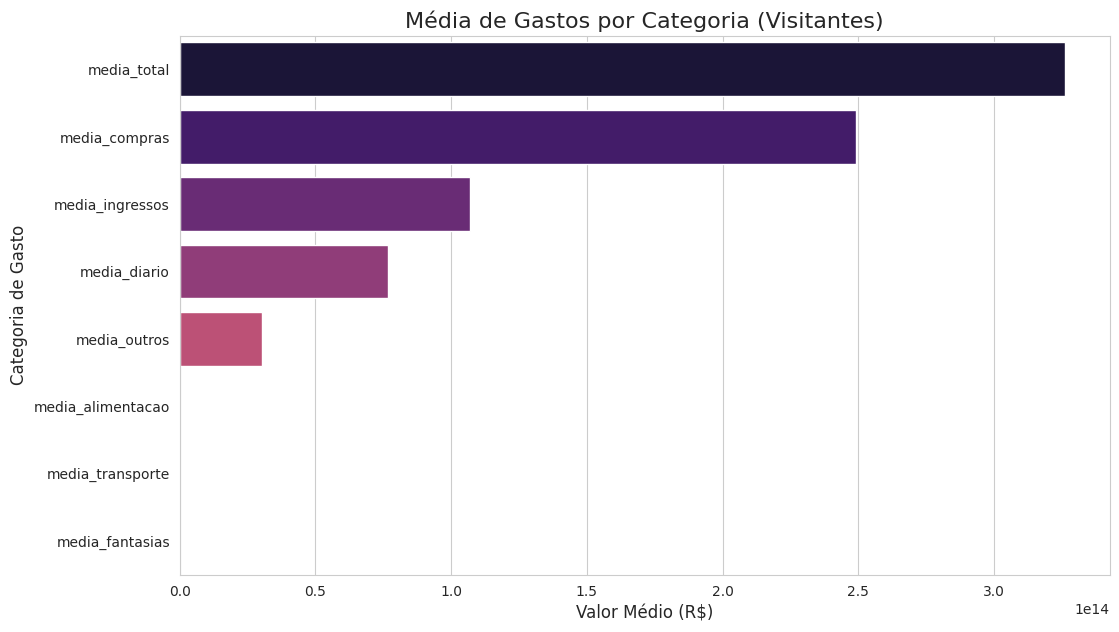

In [ ]:
# --- Visualização ---
df_gastos_visitantes_melted = df_gastos_visitantes.melt(var_name='Categoria de Gasto', value_name='Valor Médio (R$)')

plt.figure(figsize=(12, 7))
sns.barplot(
    data=df_gastos_visitantes_melted.sort_values('Valor Médio (R$)', ascending=False),
    x='Valor Médio (R$)',
    y='Categoria de Gasto',
    palette='magma'
)
plt.title('Média de Gastos por Categoria (Visitantes)', fontsize=16)
plt.xlabel('Valor Médio (R$)', fontsize=12)
plt.ylabel('Categoria de Gasto', fontsize=12)
plt.show()

##Análise : Principais Meios de Hospedagem (Visitantes)

In [ ]:
# Query para identificar os 3 principais meios de hospedagem para visitantes
query_hospedagem_top3 = """
SELECT
  meiodehospedagem,
  COUNT(*) AS total
FROM tabelafinal
WHERE morador = 'Visitante' AND meiodehospedagem IS NOT NULL
GROUP BY meiodehospedagem
ORDER BY total DESC
LIMIT 3;
"""
df_hospedagem_top3 = executar_query(query_hospedagem_top3)
print("\n-- Top 3 Meios de Hospedagem (Visitantes) --")
display(df_hospedagem_top3)



-- Top 3 Meios de Hospedagem (Visitantes) --


,meiodehospedagem,total
0,Casa de Amigos/Parentes,112
1,Hoteis/Pousadas,21
2,Casa propria,12


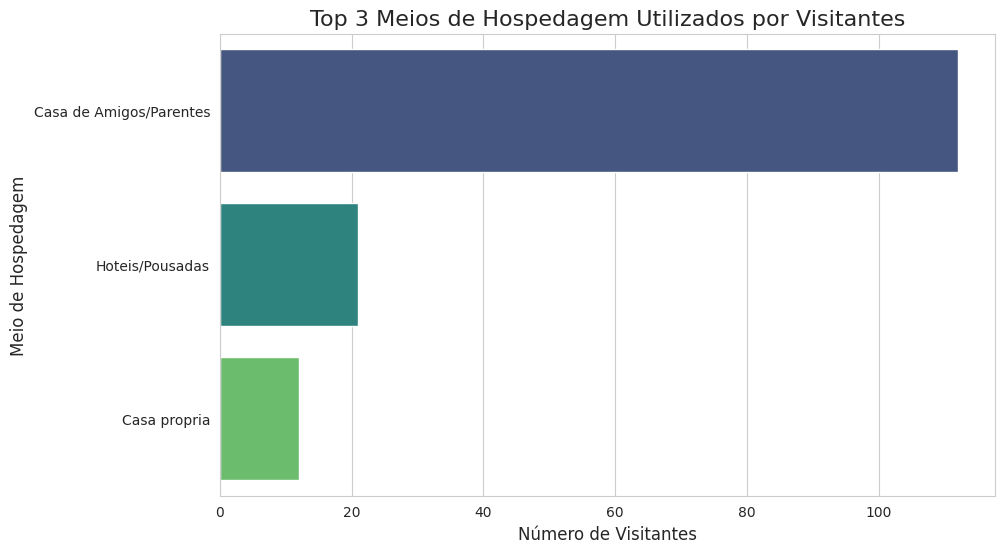

In [ ]:
# --- Visualização ---
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_hospedagem_top3,
    x='total',
    y='meiodehospedagem',
    palette='viridis'
)
plt.title('Top 3 Meios de Hospedagem Utilizados por Visitantes', fontsize=16)
plt.xlabel('Número de Visitantes', fontsize=12)
plt.ylabel('Meio de Hospedagem', fontsize=12)
plt.show()

##Análise : Principais Meios de Transporte para a Cidade

Como os foliões chegaram a Belo Horizonte? Esta análise mostra os meios de transporte mais utilizados.





In [ ]:

# Query para meios de transporte
query_transporte = """
SELECT
  transporteparacidade,
  COUNT(*) AS total
FROM tabelafinal
WHERE transporteparacidade IS NOT NULL
GROUP BY transporteparacidade
ORDER BY total DESC;
"""
df_transporte = executar_query(query_transporte)
print("\n-- Principais Meios de Transporte --")
display(df_transporte.head(5))



-- Principais Meios de Transporte --


,transporteparacidade,total
0,Carro/Moto,66
1,Onibus rodoviario,56
2,Aviao,32
3,APP onibus (Buser Click Bus),7
4,APP carro (Uber 99 In driver),7


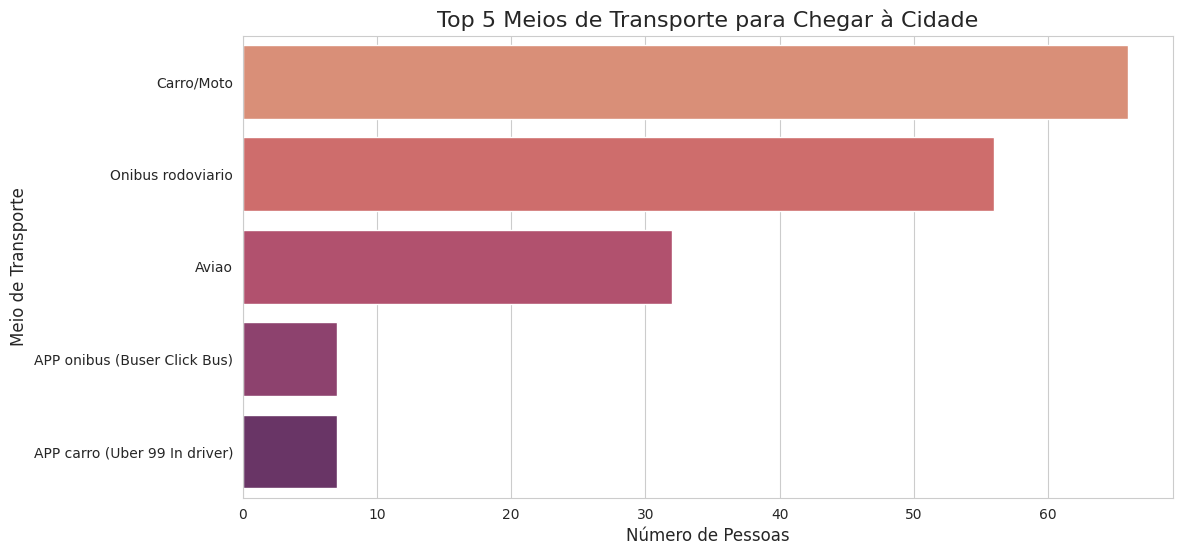

In [ ]:

# --- Visualização ---
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_transporte.head(5),
    x='total',
    y='transporteparacidade',
    palette='flare'
)
plt.title('Top 5 Meios de Transporte para Chegar à Cidade', fontsize=16)
plt.xlabel('Número de Pessoas', fontsize=12)
plt.ylabel('Meio de Transporte', fontsize=12)
plt.show()


##Análise : Análise de Pernoite dos Visitantes

Aqui verificamos a proporção de visitantes que dormiram na cidade e a média de noites que permaneceram.



In [ ]:
query_media_pernoite = """
SELECT
    COALESCE(ROUND(AVG(quantaspernoites), 2), 0) AS media_pernoites
FROM tabelafinal
WHERE morador = 'Visitante' AND quantaspernoites IS NOT NULL;
"""
df_media_pernoite = executar_query(query_media_pernoite)
print("\n-- Média de Pernoites (Filtro 'Visitante') --")
display(df_media_pernoite)



-- Média de Pernoites (Filtro 'Visitante') --


,media_pernoites
0,4.69


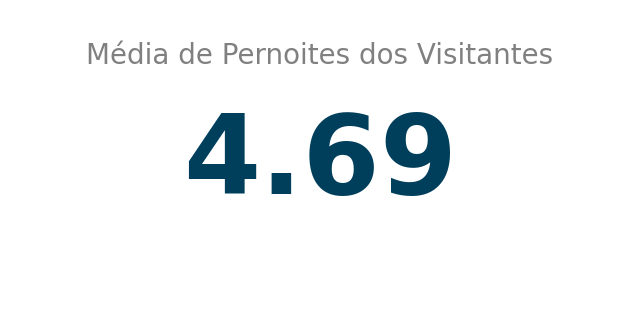

In [ ]:
# --- Visualização (Estilo Indicador/KPI) ---
media_valor = df_media_pernoite['media_pernoites'].iloc[0]

# Cria a área do gráfico
fig, ax = plt.subplots(figsize=(8, 4))

# Formatação do texto para o valor principal
ax.text(0.5, 0.5, f'{media_valor:.2f}',
        ha='center',
        va='center',
        fontsize=80,
        fontweight='bold',
        color='#003f5c') # Cor escura para o número

# Formatação do texto para o título/descrição
ax.text(0.5, 0.85, 'Média de Pernoites dos Visitantes',
        ha='center',
        va='center',
        fontsize=20,
        color='gray')

# Remove os eixos e as bordas para um visual limpo
ax.axis('off')
plt.show()

#LIÇOES APRENDIDAS


Lições aprendidas: na organização dos dados do questioraio para tabela, alguns estados se juntaram a paises na coluna de ufpais




Profundidade do Questionario: pq visitiantes respoderam que era moradores , mas nao eram realmente moradores.

O valor `999999` foi tratado como "não respondeu" e não entra no cálculo da média.